# REST API
- Representational State Transfer
- Client와 Server가 통신하기 위한 URL 구조에 대한 정의 및 디자인

## 1\. Kakao API

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import requests, json

### 1-1. request token 얻기
- `https://developers.kakao.com/`
- 내 애플리케이션 > 애플리케이션 추가하기

In [2]:
REST_API_KEY = '0cce268245c5079be0c151df10eaa945'

### 1-2. Daum 검색 API
- https://developers.kakao.com/docs/latest/ko/daum-search/dev-guide

In [3]:
query = 'KT'
headers = {'Authorization': f'KakaoAK {REST_API_KEY}'}
url = f'https://dapi.kakao.com/v2/search/web?query={query}'
repsonse = requests.get(url, headers=headers)
repsonse

<Response [200]>

In [4]:
data = repsonse.json()['documents']
data[0]

{'contents': '<b>kt</b> wiz는 <b>KT</b>가 운영하는 KBO 리그 프로야구단이다. 연고지는 경기도 수원시, 홈구장은 장안구 조원동에 위치한 수원종합운동장 내의 수원 <b>케이티</b> 위즈 파크다. 2014년 시즌 KBO 퓨처스리그에 참가하고, 2015...',
 'datetime': '2024-09-09T00:00:00.000+09:00',
 'title': '<b>kt</b> wiz - 나무위키',
 'url': 'https://namu.wiki/w/kt%20wiz'}

### 1-3. 데이터 전처리

In [5]:
df = pd.DataFrame(data)
df.tail(2)

,contents,datetime,title,url
8,<b>kt</b> 롤스터가 2세트 반격에 성공했다. <b>kt</b> 롤스터는 초반...,2024-08-24T16:38:00.000+09:00,"[LCK PO] <b>KT</b>, 한타에서 T1 제압하며 1:1 동점",https://www.inven.co.kr/webzine/news/?news=298...
9,식별하는 ‘AI 스미싱 대응 시스템’ 활용 DDoS를 비롯해 지능화되고 있는 각종 ...,2024-09-11T16:06:08.000+09:00,"<b>KT</b>, 추석 대비 인구 밀집 지역 1천여곳 점검 끝내",https://www.whitepaper.co.kr/news/articleView....


In [6]:
# 정규표현식을 이용한 html 코드 처리
import re
html = df.loc[8, 'title']
text = re.sub('<.{1,2}>', '', html)
text

'[LCK PO] KT, 한타에서 T1 제압하며 1:1 동점'

In [7]:
columns = ['title', 'contents']
for column in columns:
    df[column] = df[column].apply(
        lambda data: re.sub('<.{1,2}>', '', data))
df.tail(2)

,contents,datetime,title,url
8,kt 롤스터가 2세트 반격에 성공했다. kt 롤스터는 초반 드래곤보다 골드에 집중한...,2024-08-24T16:38:00.000+09:00,"[LCK PO] KT, 한타에서 T1 제압하며 1:1 동점",https://www.inven.co.kr/webzine/news/?news=298...
9,식별하는 ‘AI 스미싱 대응 시스템’ 활용 DDoS를 비롯해 지능화되고 있는 각종 ...,2024-09-11T16:06:08.000+09:00,"KT, 추석 대비 인구 밀집 지역 1천여곳 점검 끝내",https://www.whitepaper.co.kr/news/articleView....


## 2\. Naver API
- 통합검색어 트렌드 API
    - https://datalab.naver.com/
    - https://datalab.naver.com/keyword/trendSearch.naver

In [8]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import requests, json

### 2-1. Request Token 얻기
- `https://developers.naver.com`
- 1. Request Token 얻기 : 애플리케이션등록 -> app_key 획득
- 2. app_key를 이용해서 데이터 가져오기

In [9]:
CLIENT_ID, CLIENT_SECRET = '0Hlov6rtCak7ZOyvLHD5', '79S8pQkQkf'

### 2-2. 통합검색어 트렌드 API
- 서비스 : `https://datalab.naver.com/keyword/trendSearch.naver`
- 내 애플리케이션 > dss 애플리케이션 > API 설정 > 데이터랩(검색어 트렌드) 추가
- 사용법 : `https://developers.naver.com/docs/serviceapi/datalab/search/search.md#통합-검색어-트렌드`

In [10]:
# 1. URL
url = 'https://openapi.naver.com/v1/datalab/search'

In [11]:
# 2. request > response
params = {
    'startDate': '2018-01-01',
    'endDate': '2024-01-01',
    'timeUnit': 'month',
    'keywordGroups': [
        {'groupName': '트위터', 'keywords': ['트위터', '트윗']},
        {'groupName': '페이스북', 'keywords': ['페이스북', '페북']},
        {'groupName': '인스타그램', 'keywords': ['인스타그램', '인스타']},
    ]
}

In [12]:
headers = {
    'Content-Type': 'application/json',
    'X-Naver-Client-Id': CLIENT_ID,
    'X-Naver-Client-Secret': CLIENT_SECRET,    
}

In [13]:
response = requests.post(url, data=json.dumps(params), headers=headers)
response

<Response [200]>

In [14]:
# 3. parsing
data = response.json()['results']

In [15]:
dfs = []
for row in data:
    df = pd.DataFrame(row['data'])
    df['title'] = row['title'] # 트위터, 페이스북, 인스타그램
    dfs.append(df)

In [16]:
# 4. preprocessing

In [17]:
result_df = pd.concat(dfs, ignore_index=True)
result_df.tail(2)

,period,ratio,title
217,2023-12-01,21.84237,인스타그램
218,2024-01-01,21.69092,인스타그램


In [18]:
pivot_df = result_df.pivot(index='period', columns='title', values='ratio')
pivot_df.columns = ['instagram', 'twitter', 'facebook']
pivot_df.tail(2)

,instagram,twitter,facebook
period,,,
2023-12-01,21.84237,23.01963,10.12856
2024-01-01,21.69092,23.82156,10.20900


In [19]:
# 5. visualization

In [20]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [21]:
import matplotlib.pyplot as plt

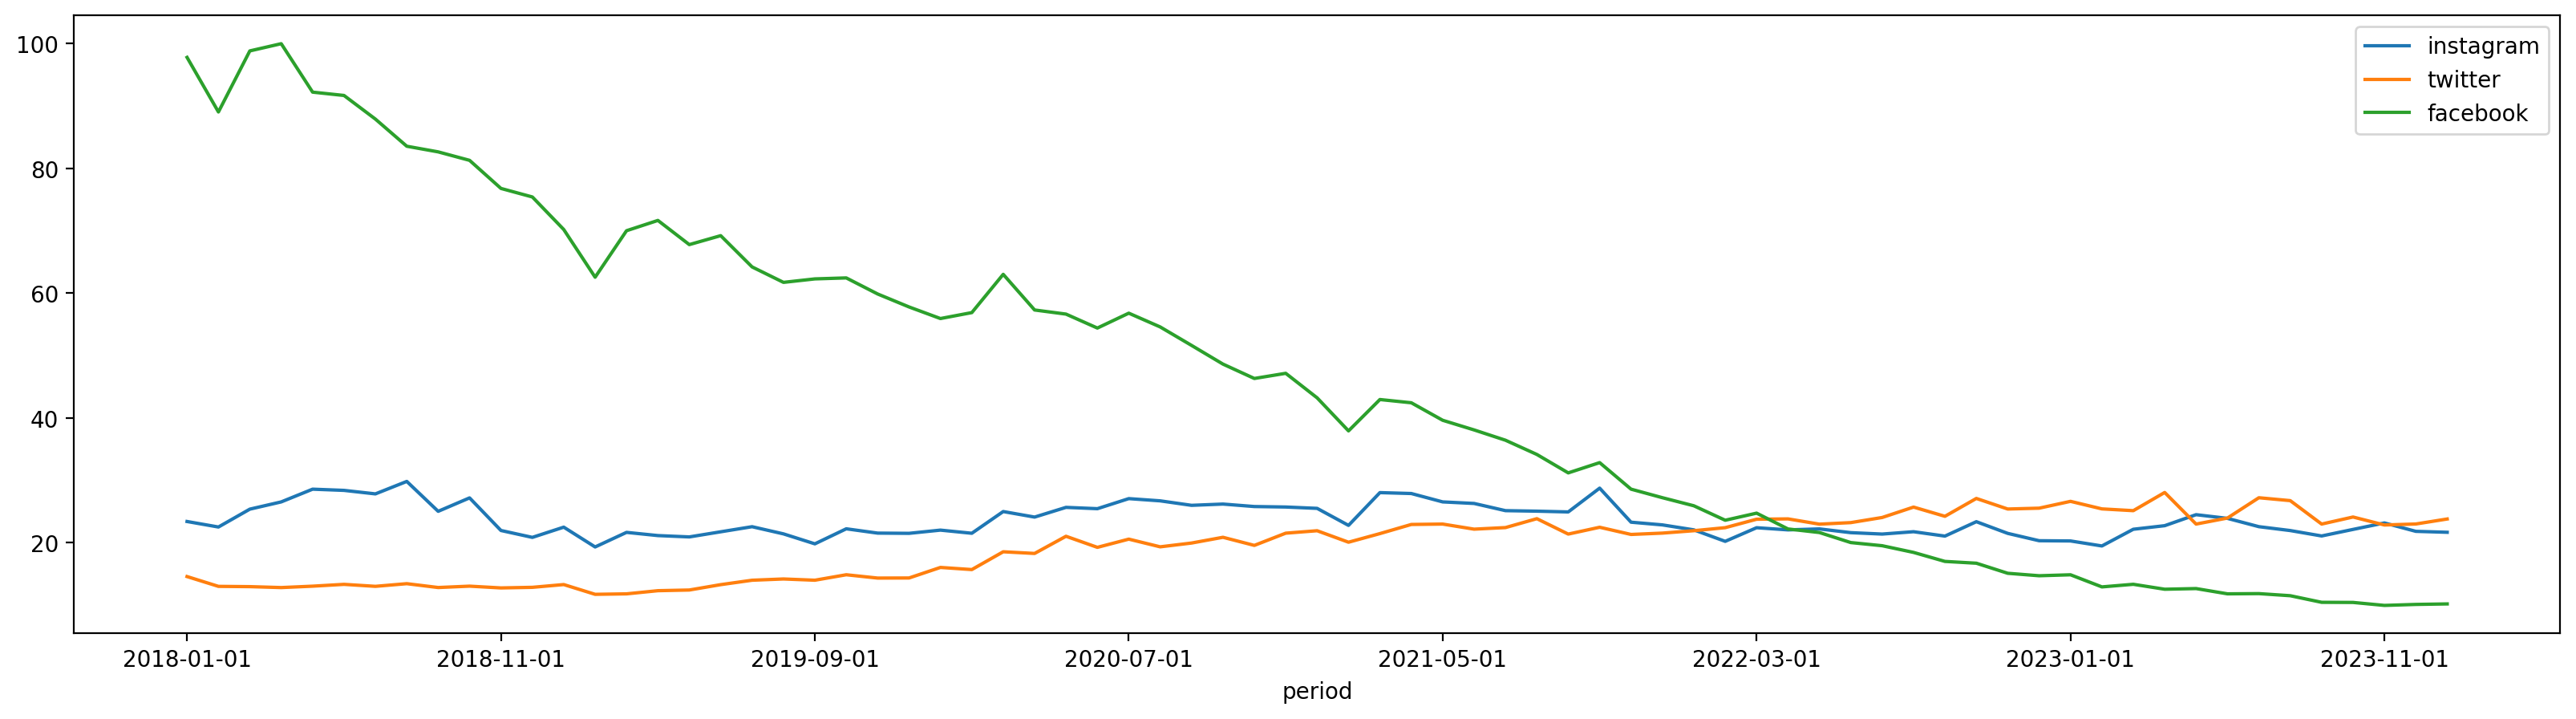

In [22]:
pivot_df.plot(figsize=(20, 5))
plt.legend(loc=0)
plt.show()